Cancer Prediction

In [1]:
# Importing essential libraries
import numpy as np
import pandas as pd

In [3]:
# Loading the dataset
df = pd.read_csv('cancer.csv')

Exploring the dataset

In [4]:
# Returns number of rows and columns of the dataset

df.shape

(1500, 9)

In [5]:
# Returns an object with all of the column headers
df.columns

Index(['Age', 'Gender', 'BMI', 'Smoking', 'GeneticRisk', 'PhysicalActivity',
       'AlcoholIntake', 'CancerHistory', 'Diagnosis'],
      dtype='object')

In [6]:

# Returns different datatypes for each columns (float, int, string, bool, etc.)
df.dtypes

,0
Age,int64
Gender,int64
BMI,float64
Smoking,int64
GeneticRisk,int64
PhysicalActivity,float64
AlcoholIntake,float64
CancerHistory,int64
Diagnosis,int64


In [7]:
# Returns the first x number of rows when head(x). Without a number it returns 5
df.head()

,Age,Gender,BMI,Smoking,GeneticRisk,PhysicalActivity,AlcoholIntake,CancerHistory,Diagnosis
0,58,1,16.085313,0,1,8.146251,4.148219,1,1
1,71,0,30.828784,0,1,9.361630,3.519683,0,0
2,48,1,38.785084,0,2,5.135179,4.728368,0,1
3,34,0,30.040296,0,0,9.502792,2.044636,0,0
4,62,1,35.479721,0,0,5.356890,3.309849,0,1


In [8]:
# Returns the last x number of rows when tail(x). Without a number it returns 5
df.tail()

,Age,Gender,BMI,Smoking,GeneticRisk,PhysicalActivity,AlcoholIntake,CancerHistory,Diagnosis
1495,62,1,25.090025,0,0,9.892167,1.284158,0,1
1496,31,0,33.447125,0,1,1.668297,2.280636,1,1
1497,63,1,32.613861,1,1,0.466848,0.150101,0,1
1498,55,0,25.568216,0,0,7.795317,1.986138,1,1
1499,67,1,23.663104,0,0,2.525860,2.856600,1,0


In [9]:
# Returns true for a column having null values, else false
df.isnull().any()

,0
Age,False
Gender,False
BMI,False
Smoking,False
GeneticRisk,False
PhysicalActivity,False
AlcoholIntake,False
CancerHistory,False
Diagnosis,False


In [10]:
# Returns basic information on all columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1500 non-null   int64  
 1   Gender            1500 non-null   int64  
 2   BMI               1500 non-null   float64
 3   Smoking           1500 non-null   int64  
 4   GeneticRisk       1500 non-null   int64  
 5   PhysicalActivity  1500 non-null   float64
 6   AlcoholIntake     1500 non-null   float64
 7   CancerHistory     1500 non-null   int64  
 8   Diagnosis         1500 non-null   int64  
dtypes: float64(3), int64(6)
memory usage: 105.6 KB


In [11]:
# Returns basic statistics on numeric columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1500.0,50.320000,17.640968,20.000000,35.000000,51.000000,66.000000,80.000000
Gender,1500.0,0.490667,0.500080,0.000000,0.000000,0.000000,1.000000,1.000000
BMI,1500.0,27.513321,7.230012,15.000291,21.483134,27.598494,33.850837,39.958688
Smoking,1500.0,0.269333,0.443761,0.000000,0.000000,0.000000,1.000000,1.000000
GeneticRisk,1500.0,0.508667,0.678895,0.000000,0.000000,0.000000,1.000000,2.000000
PhysicalActivity,1500.0,4.897929,2.866162,0.002410,2.434609,4.834316,7.409896,9.994607
AlcoholIntake,1500.0,2.417987,1.419318,0.001215,1.210598,2.382971,3.585624,4.987115
CancerHistory,1500.0,0.144000,0.351207,0.000000,0.000000,0.000000,0.000000,1.000000
Diagnosis,1500.0,0.371333,0.483322,0.000000,0.000000,0.000000,1.000000,1.000000


Data Visualization

In [12]:
# Importing essential libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

<ipython-input-13-fdfb3b84688d>:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  g = df.hist(ax=ax)


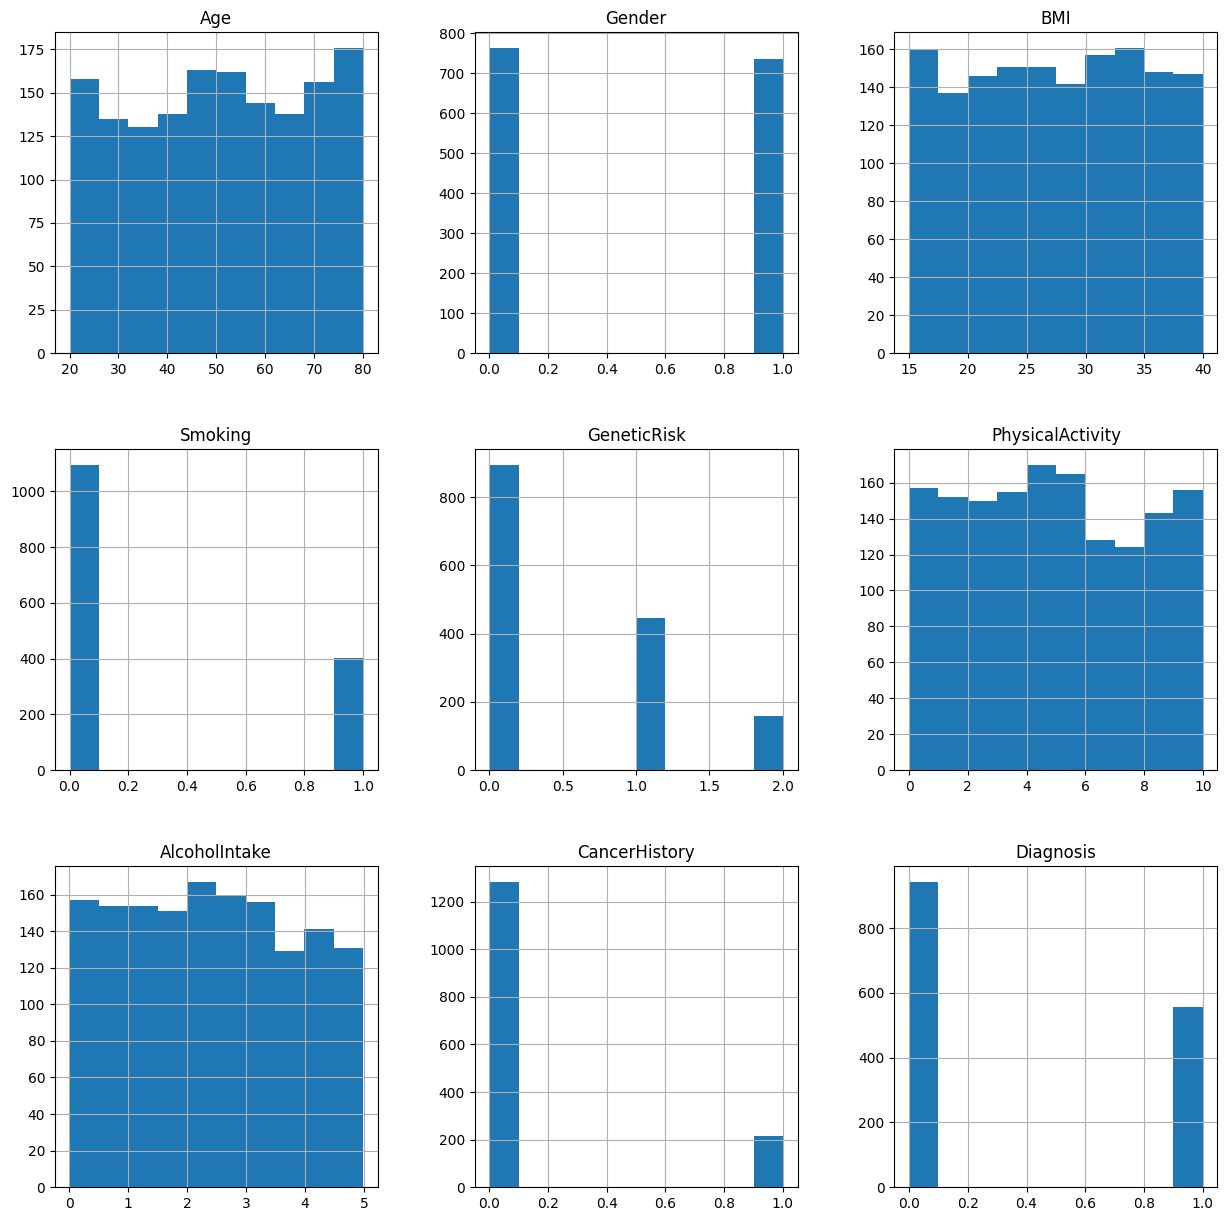

In [13]:
# Plotting histogram for the entire dataset
fig = plt.figure(figsize = (15,15))
ax = fig.gca()
g = df.hist(ax=ax)

Text(0, 0.5, 'Count')

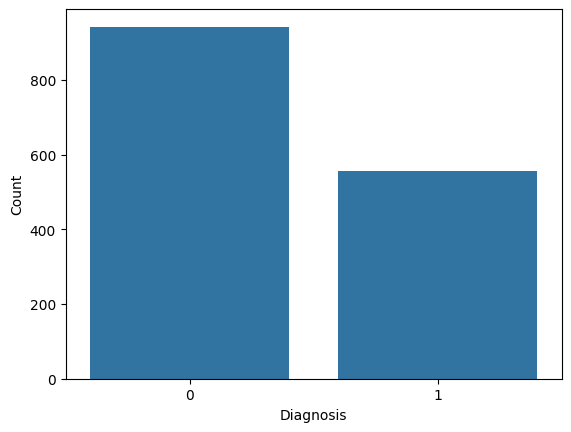

In [16]:
# Visualization to check if the dataset is balanced or not
g = sns.countplot(x='Diagnosis', data=df)
plt.xlabel('Diagnosis')
plt.ylabel('Count')

Feature Engineering

Feature Selection

<Axes: >

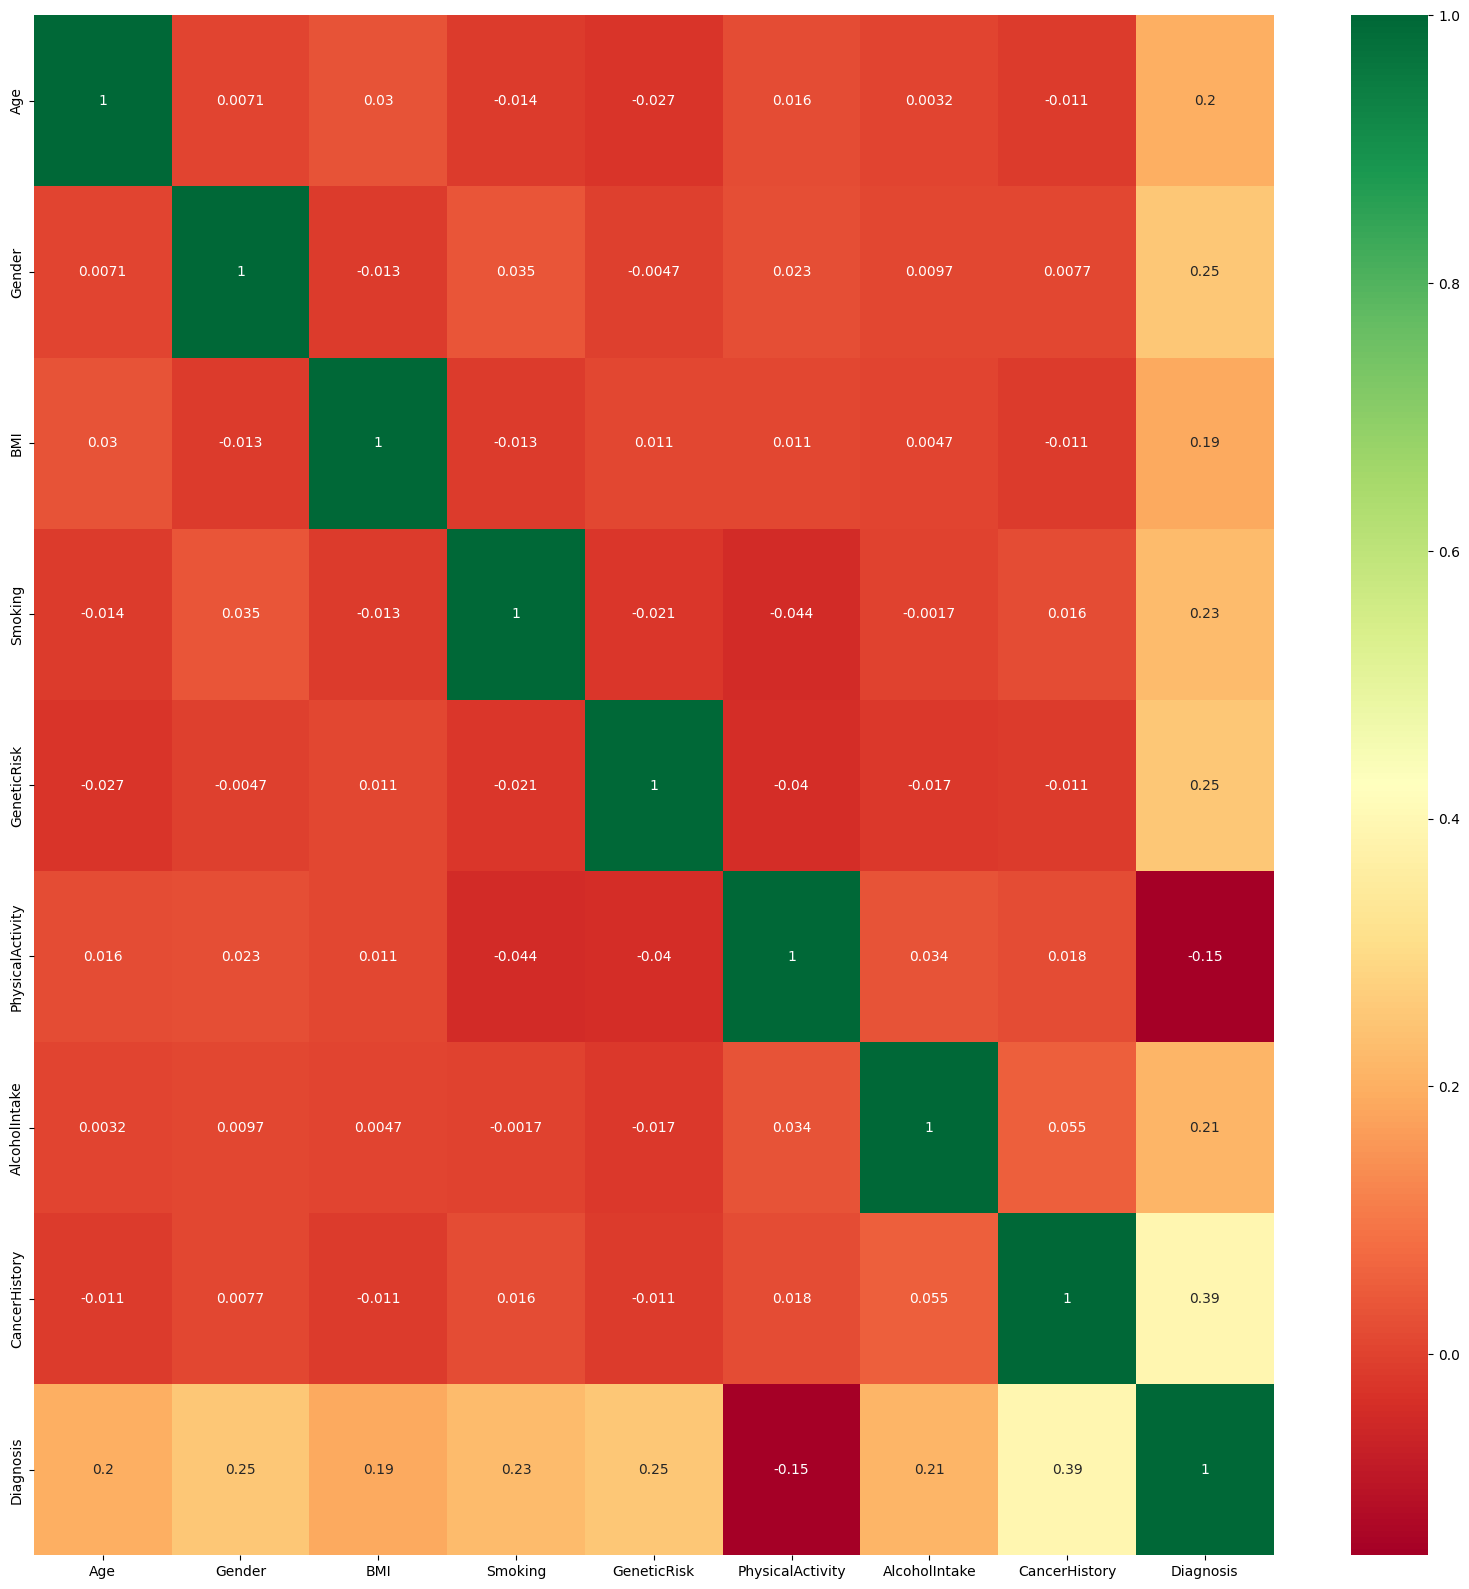

In [17]:
# Selecting correlated features using Heatmap

# Get correlation of all the features of the dataset
corr_matrix = df.corr()
top_corr_features = corr_matrix.index

# Plotting the heatmap
plt.figure(figsize=(20,20))
sns.heatmap(data=df[top_corr_features].corr(), annot=True, cmap='RdYlGn')

Data Preprocessing

Handling categorial features

In [18]:
dataset = pd.get_dummies(df, columns=['Gender', 'Smoking', 'GeneticRisk', 'PhysicalActivity', 'AlcoholIntake', 'CancerHistory'])

Feature Scaling

In [19]:
dataset.columns

Index(['Age', 'BMI', 'Diagnosis', 'Gender_0', 'Gender_1', 'Smoking_0',
       'Smoking_1', 'GeneticRisk_0', 'GeneticRisk_1', 'GeneticRisk_2',
       ...
       'AlcoholIntake_4.965818694667393', 'AlcoholIntake_4.971439928805295',
       'AlcoholIntake_4.97802100901753', 'AlcoholIntake_4.979011838899593',
       'AlcoholIntake_4.9800639169112415', 'AlcoholIntake_4.983416389673399',
       'AlcoholIntake_4.984952514062756', 'AlcoholIntake_4.9871146952677705',
       'CancerHistory_0', 'CancerHistory_1'],
      dtype='object', length=3012)

In [22]:
from sklearn.preprocessing import StandardScaler
standScaler = StandardScaler()
columns_to_scale = ['Age', 'BMI']
dataset[columns_to_scale] = standScaler.fit_transform(dataset[columns_to_scale])

In [23]:
dataset.head()

,Age,BMI,Diagnosis,Gender_0,Gender_1,Smoking_0,Smoking_1,GeneticRisk_0,GeneticRisk_1,GeneticRisk_2,...,AlcoholIntake_4.965818694667393,AlcoholIntake_4.971439928805295,AlcoholIntake_4.97802100901753,AlcoholIntake_4.979011838899593,AlcoholIntake_4.9800639169112415,AlcoholIntake_4.983416389673399,AlcoholIntake_4.984952514062756,AlcoholIntake_4.9871146952677705,CancerHistory_0,CancerHistory_1
0,0.435495,-1.581162,1,False,True,True,False,False,True,False,...,False,False,False,False,False,False,False,False,False,True
1,1.172662,0.458722,0,True,False,True,False,False,True,False,...,False,False,False,False,False,False,False,False,True,False
2,-0.131556,1.559544,1,False,True,True,False,False,False,True,...,False,False,False,False,False,False,False,False,True,False
3,-0.925428,0.349628,0,True,False,True,False,True,False,False,...,False,False,False,False,False,False,False,False,True,False
4,0.662316,1.102219,1,False,True,True,False,True,False,False,...,False,False,False,False,False,False,False,False,True,False


In [24]:
# Splitting the dataset into dependent and independent features
X = dataset.drop('Diagnosis', axis=1)
y = dataset['Diagnosis']

Model Building

KNeighbors Classifier Model

In [25]:
# Importing essential libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

In [26]:
# Finding the best accuracy for knn algorithm using cross_val_score
knn_scores = []
for i in range(1, 21):
  knn_classifier = KNeighborsClassifier(n_neighbors=i)
  cvs_scores = cross_val_score(knn_classifier, X, y, cv=10)
  knn_scores.append(round(cvs_scores.mean(),3))

Text(0.5, 1.0, 'K Neighbors Classifier scores for different K values')

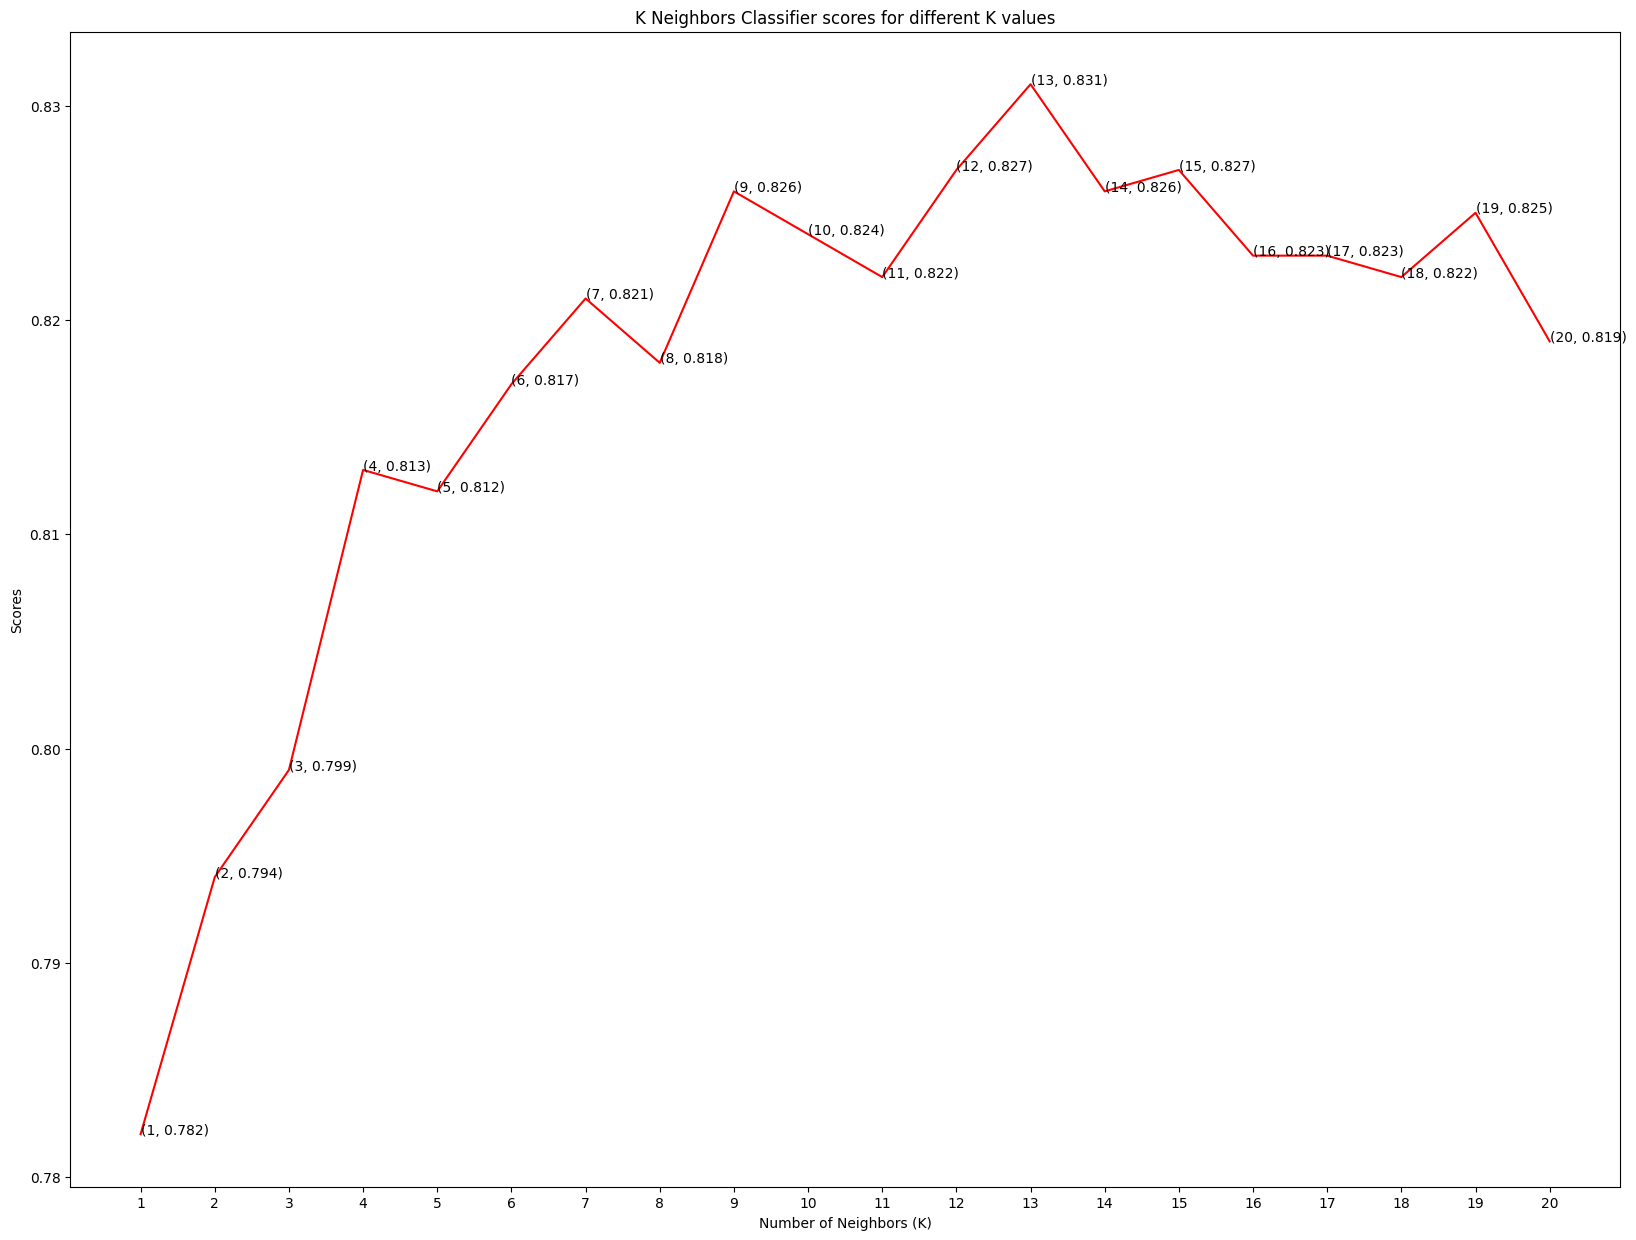

In [27]:
# Plotting the results of knn_scores
plt.figure(figsize=(20,15))
plt.plot([k for k in range(1, 21)], knn_scores, color = 'red')
for i in range(1,21):
    plt.text(i, knn_scores[i-1], (i, knn_scores[i-1]))
plt.xticks([i for i in range(1, 21)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')

In [28]:
# Training the knn classifier model with k value as 12
knn_classifier = KNeighborsClassifier(n_neighbors=12)
cvs_scores = cross_val_score(knn_classifier, X, y, cv=10)
print("KNeighbours Classifier Accuracy with K=12 is: {}%".format(round(cvs_scores.mean(), 4)*100))

KNeighbours Classifier Accuracy with K=12 is: 82.67%


Decision Tree Classifier

In [29]:
# Importing essential libraries
from sklearn.tree import DecisionTreeClassifier

In [30]:
# Finding the best accuracy for decision tree algorithm using cross_val_score
decision_scores = []
for i in range(1, 11):
  decision_classifier = DecisionTreeClassifier(max_depth=i)
  cvs_scores = cross_val_score(decision_classifier, X, y, cv=10)
  decision_scores.append(round(cvs_scores.mean(),3))

Text(0.5, 1.0, 'Decision Tree Classifier scores for different depth values')

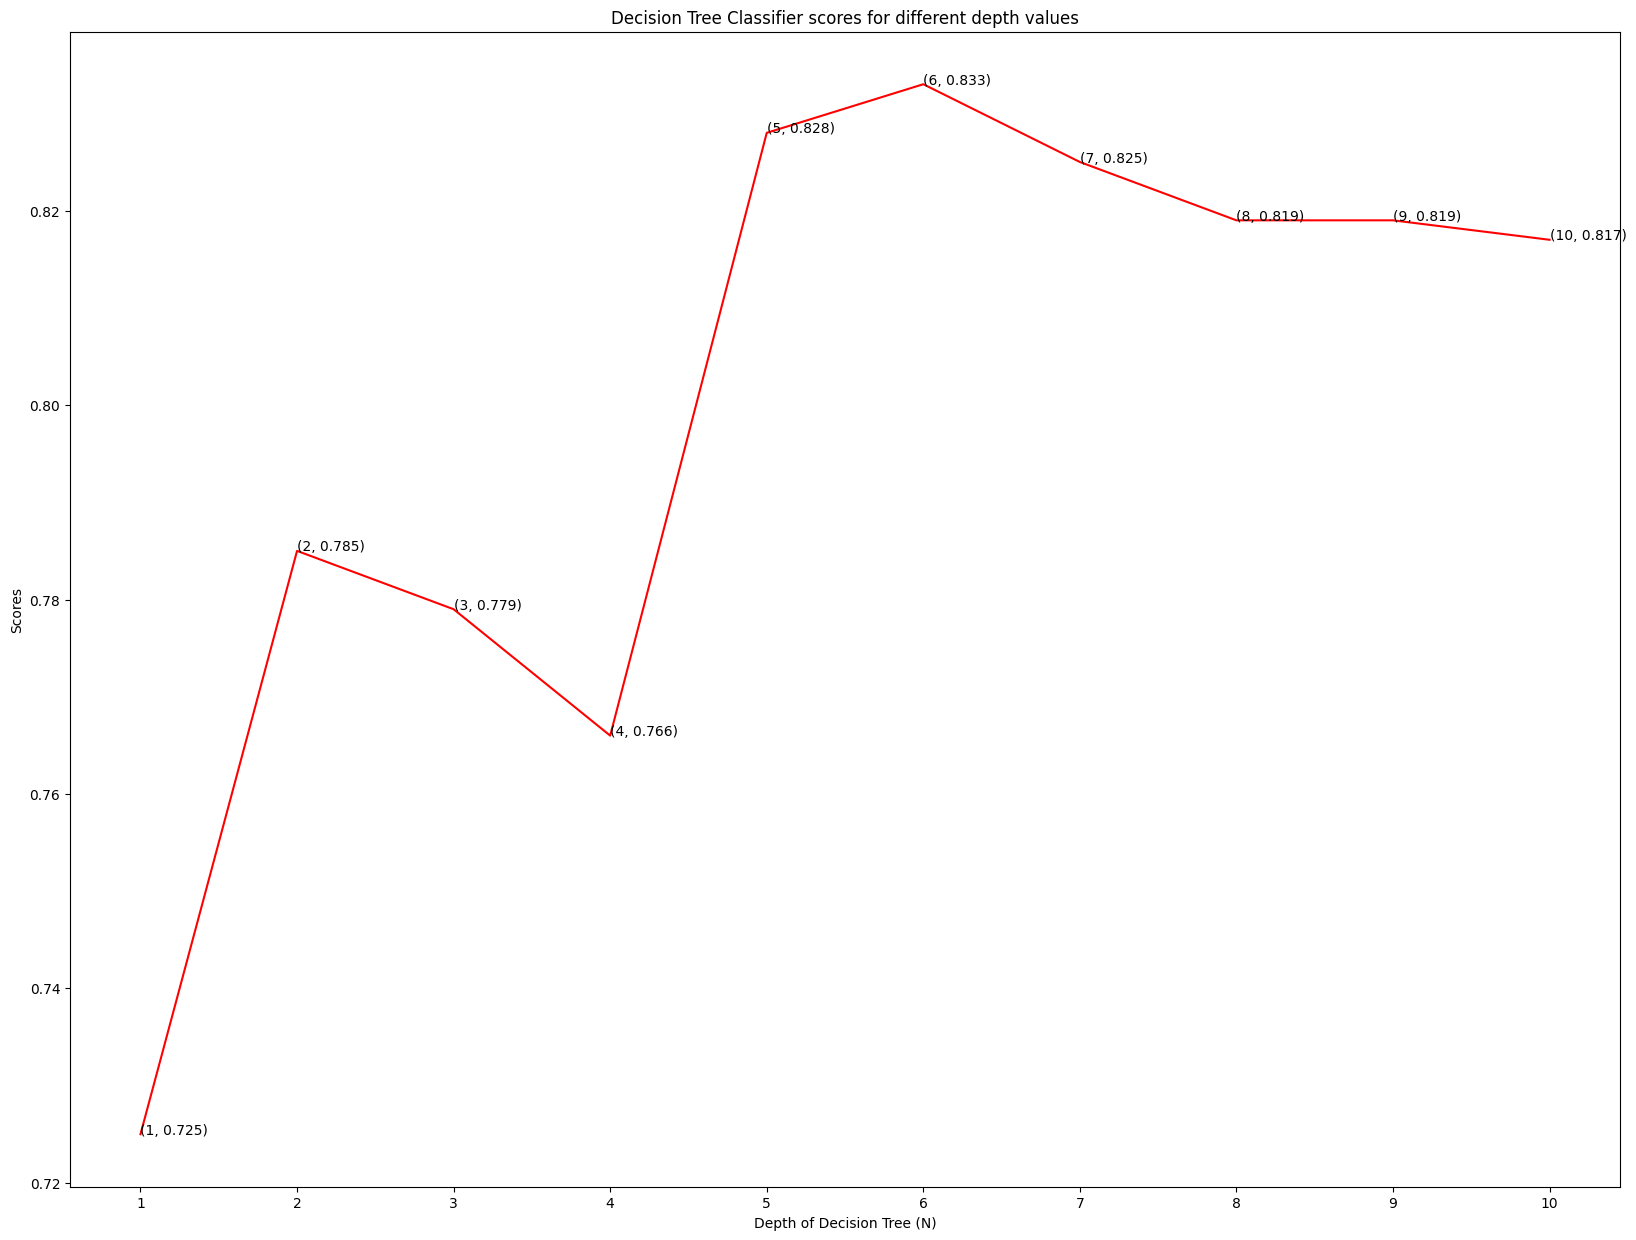

In [31]:
# Plotting the results of decision_scores
plt.figure(figsize=(20,15))
plt.plot([i for i in range(1, 11)], decision_scores, color = 'red')
for i in range(1,11):
    plt.text(i, decision_scores[i-1], (i, decision_scores[i-1]))
plt.xticks([i for i in range(1, 11)])
plt.xlabel('Depth of Decision Tree (N)')
plt.ylabel('Scores')
plt.title('Decision Tree Classifier scores for different depth values')

In [32]:
# Training the decision tree classifier model with max_depth value as 3
decision_classifier = DecisionTreeClassifier(max_depth=3)
cvs_scores = cross_val_score(decision_classifier, X, y, cv=10)
print("Decision Tree Classifier Accuracy with max_depth=3 is: {}%".format(round(cvs_scores.mean(), 4)*100))

Decision Tree Classifier Accuracy with max_depth=3 is: 77.86999999999999%


Naive Bayes Classifier

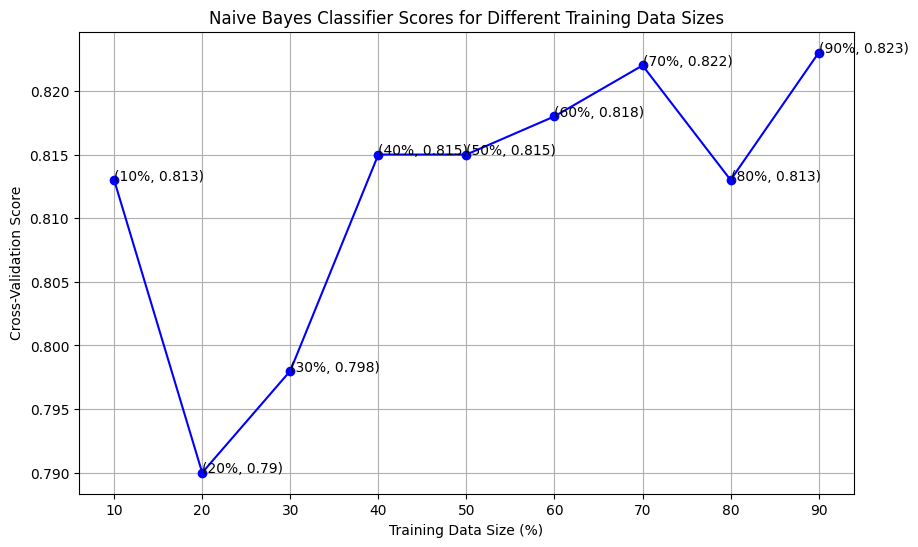

In [38]:
# Importing essential libraries
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score, train_test_split
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Load Dataset
data = pd.read_csv('cancer.csv')

# Data Preprocessing
X = data.drop('Diagnosis', axis=1)
y = data['Diagnosis']

# Define percentages of data to be used for training (10% to 90% instead of 100%)
train_sizes = np.arange(0.1, 1.0, 0.1)  # Exclude 1.0 to prevent the error

# Store the cross-validation scores
nb_scores = []

# Iterate through different train sizes to evaluate Naive Bayes performance
for size in train_sizes:
    # Split the data based on the current train size
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=size, random_state=42)

    # Initialize the Naive Bayes model
    nb = GaussianNB()

    # Perform 5-fold cross-validation and calculate the mean score
    cvs_scores = cross_val_score(nb, X_train, y_train, cv=5)
    nb_scores.append(round(cvs_scores.mean(), 3))

# Plotting the results of Naive Bayes scores
plt.figure(figsize=(10, 6))
plt.plot(train_sizes * 100, nb_scores, color='blue', marker='o', linestyle='-')

# Annotate each point with the corresponding score
for i, score in enumerate(nb_scores):
    plt.text(train_sizes[i] * 100, score, f"({int(train_sizes[i] * 100)}%, {score})", fontsize=10)

# Customize the graph
plt.xticks([i * 10 for i in range(1, 10)])  # Adjusted x-axis ticks
plt.xlabel('Training Data Size (%)')
plt.ylabel('Cross-Validation Score')
plt.title('Naive Bayes Classifier Scores for Different Training Data Sizes')
plt.grid(True)
plt.show()
